In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from sklearn import __version__ as sklearn_version
from library.sb_utils import save_file

In [2]:
#load in model
model_path = 'C:/Users/Anthony/GitHub/Capstone-Two/Models/model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)

In [3]:
#load in main dataframe
df = pd.read_csv('C:/Users/Anthony/Springboard/CapstoneTwo/DataCSV/df.csv')
#df.head()

Correlation between various features


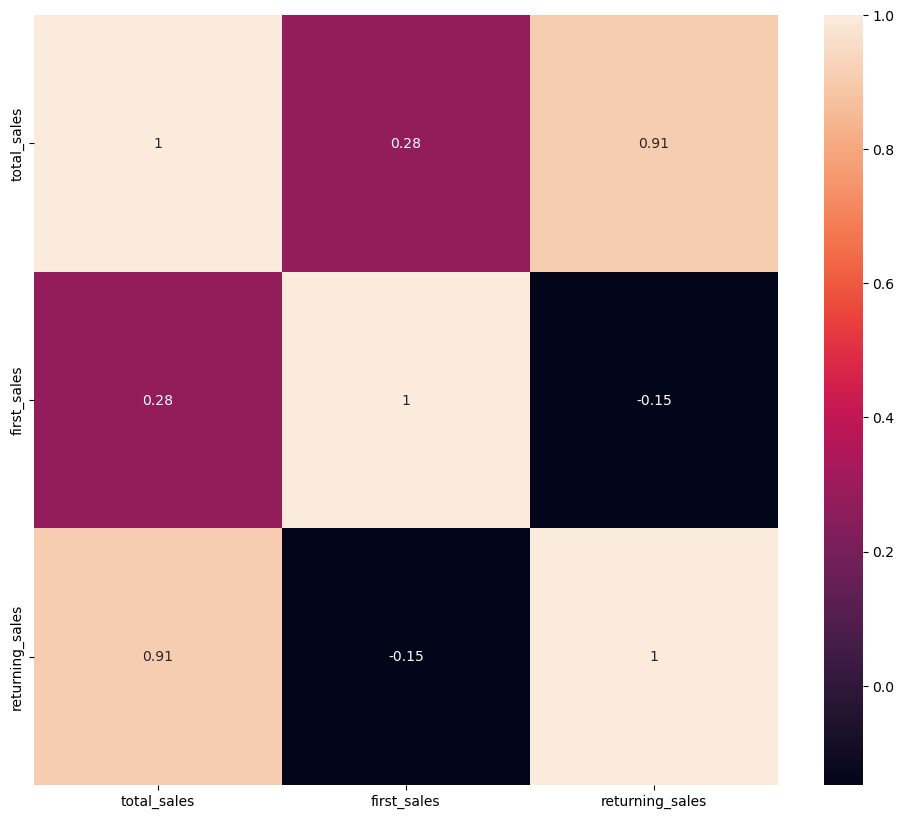

In [4]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df[['total_sales', 'first_sales', 'returning_sales']].corr(), annot=True)

This heatmap suggests that there is a strong correlation between returning sales and the total value a customer gives us, as opposed to only the amount in the first sale. We will be focusing directly on which item can give us the most returning sale value. 

In [5]:
#Adding 3 new columns to the dataset to help with modeling
df['first_sales_scaled'] = model.fit_transform(df[['first_sales']])
df['returning_sales_scaled'] = model.fit_transform(df[['returning_sales']])
df['value'] = df.returning_sales_scaled > df.returning_sales_scaled.mean()

In [6]:
#Training and testing the data twice, so I have a train and test set for each starting purchase
from sklearn.model_selection import train_test_split
X = df[['first_sales_scaled', 'type']]
y = (df.returning_sales_scaled > df.returning_sales_scaled.mean()).values
ys = df['value'][df['type'] == 'sb'].values
yn = df['value'][df['type'] == 'nsb'].values

X = pd.get_dummies(X)

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X[X['type_sb'] == 1], ys, test_size = .25, random_state = 246)

model.fit_transform(Xs_train)
Xs_test = model.transform(Xs_test)

In [7]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X[X['type_nsb'] == 1], yn, test_size = .25, random_state = 246)

model.fit_transform(Xn_train)
Xn_test = model.transform(Xn_test)

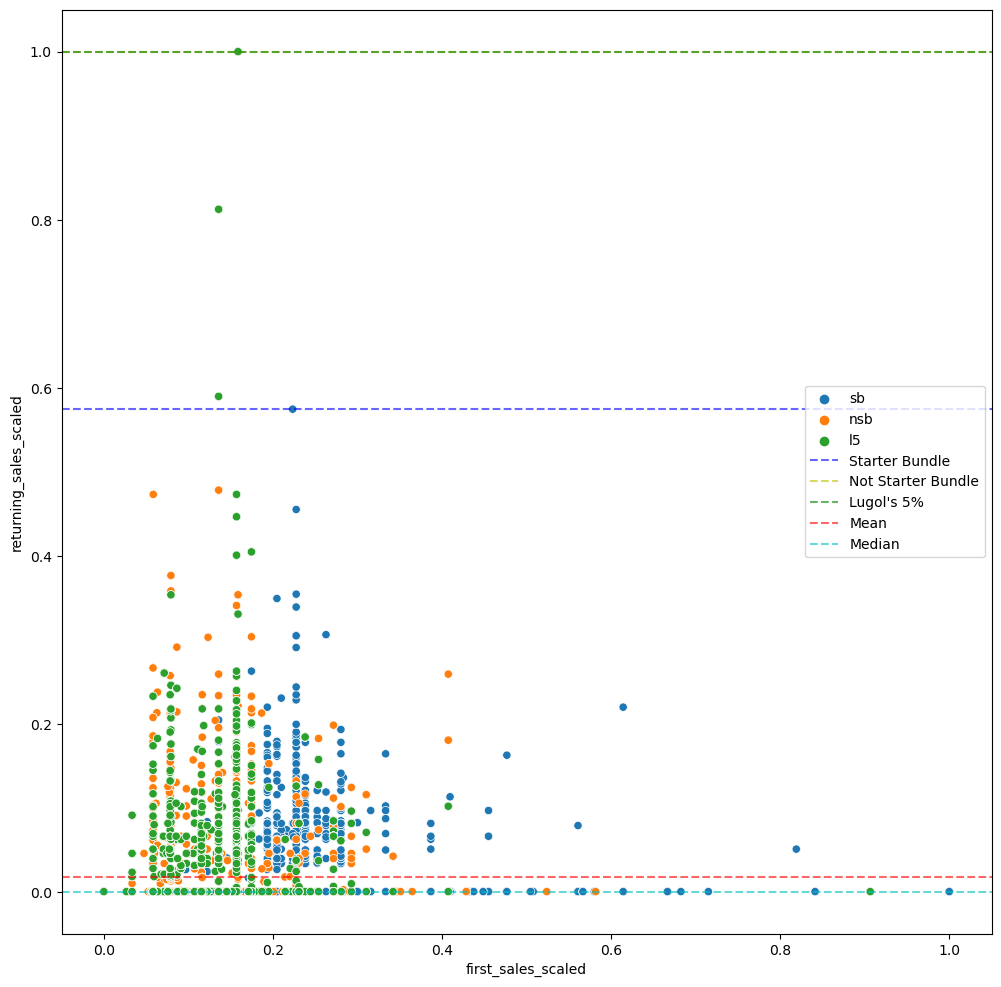

In [8]:
plt.subplots(figsize = (12,12))
sns.scatterplot(x = 'first_sales_scaled', y = 'returning_sales_scaled', data = df, hue = 'type')
plt.axhline(y=df['returning_sales_scaled'][df['type'] == 'sb'].max(), c='b', ls='--', alpha=0.6, label='Starter Bundle')
plt.axhline(y=df['returning_sales_scaled'][df['type'] == 'nsb'].max(), c='y', ls='--', alpha=0.6, label='Not Starter Bundle')
plt.axhline(y=df['returning_sales_scaled'][df['type'] == 'l5'].max(), c='g', ls='--', alpha=0.6, label="Lugol's 5%")
plt.axhline(y=df['returning_sales_scaled'].mean(), c='r', ls='--', alpha=0.6, label="Mean")
plt.axhline(y=df['returning_sales_scaled'].median(), c='c', ls='--', alpha=0.6, label="Median")
plt.legend()

In [9]:
print("The most spent in returning sales by somebody who bought the Starter Bundle first is " + str(round(df['returning_sales_scaled'][df['type'] == 'sb'].max() * 100, 2)) + "%, or just over half of the most     spent in returning sales by somebody who bought anything but the Starter Bundle first.")
print(' ')
print("The mean returning sales amount is only greater than " + str(round(df['returning_sales_scaled'].mean() * 100, 2)) + "% of the data.")

The most spent in returning sales by somebody who bought the Starter Bundle first is 57.43%, or just over half of the most     spent in returning sales by somebody who bought anything but the Starter Bundle first.
 
The mean returning sales amount is only greater than 1.69% of the data.


From this model, we can get a really good idea of the distribution of the datapoints, as well as see more clearly where each instance stands in relation to the rest of the data. Towards the lower right side of the chart, we have a fair amount of blue data points, indicating customers who spent a lot of money initially, but did not come back and spend a lot more. We can get a pretty good measure of how significant that is when we look at the median and the mean. The median is right on the bottom, showing that at least 50% of the instances measured showed no return value at all. The mean being so low is indicative of lots of zeros in the returning sales column. I also made it a point to point out where the maximum of each different type was, so we can see exactly how journeys beginnning with the Starter Bundle stack up to the others. We can note that at the top, the Not Starter Bundle maximum line is being the Lugol's 5% maximum line, since the Lugol's 5% is an item that is not the Starter Bundle.

From here, I want to see if there is a specific order type dragging down our mean. I'm going make this same chart 3 more times, this time splitting it up by type.

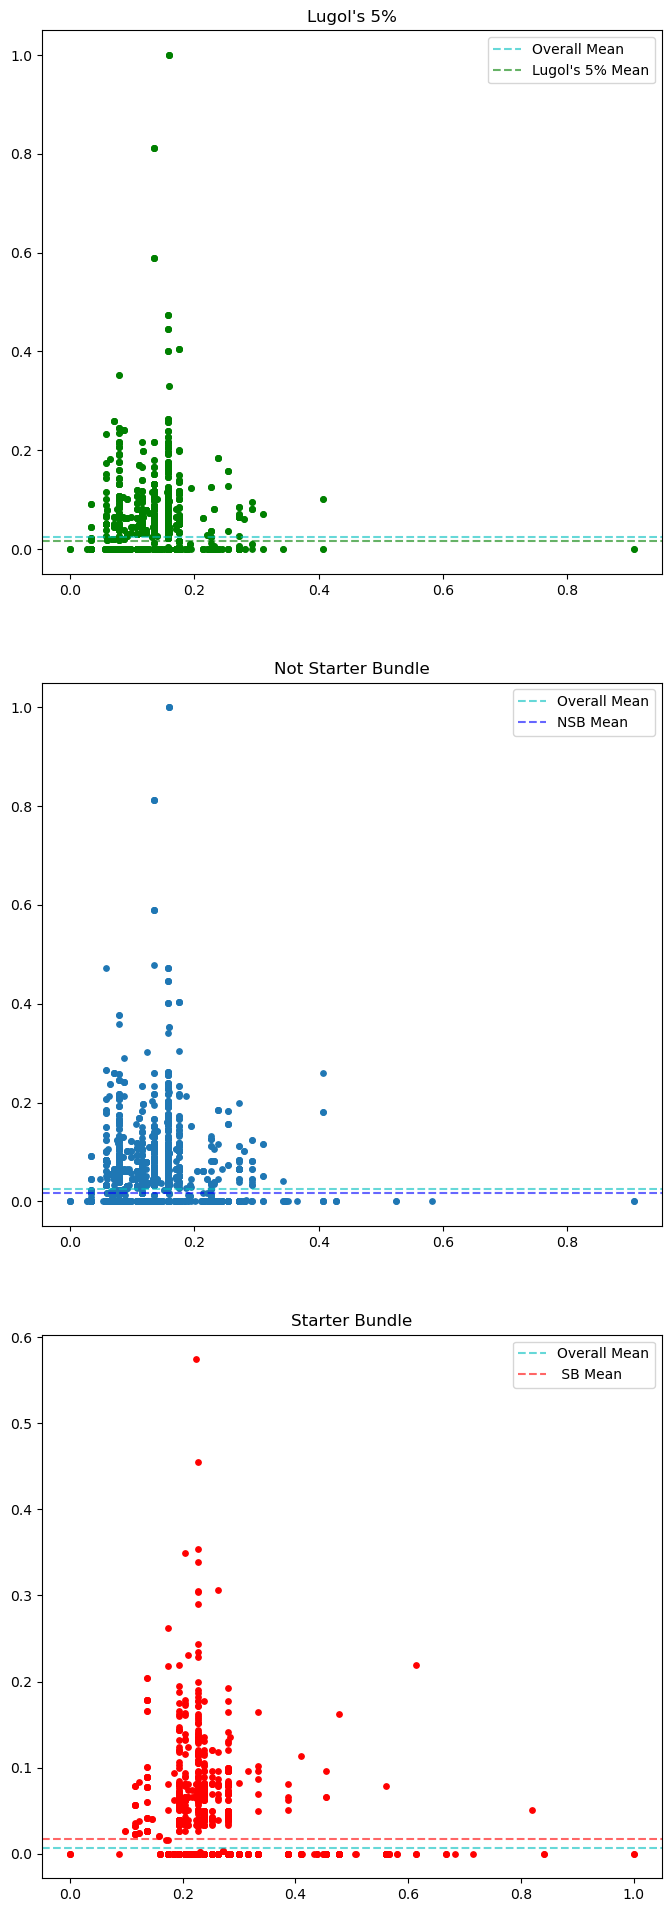

In [10]:
fig, ax = plt.subplots(3,1, figsize=(8, 24))
fig.subplots_adjust(wspace=0.5)
ax[2].scatter(x = df['first_sales_scaled'][df['type'] == 'sb'], y = df['returning_sales_scaled'][df['type'] == 'sb'], c = 'red', s = 15)
ax[2].set(title = 'Starter Bundle')
ax[2].axhline(y=df['returning_sales_scaled'][df['type'] == 'sb'].mean(), c='c', ls='--', alpha=0.6, label="Overall Mean")
ax[2].axhline(y=df['returning_sales_scaled'].mean(), c='r', ls='--', alpha=0.6, label=" SB Mean")
ax[2].legend()
ax[1].scatter(x = df['first_sales_scaled'][df['type'] == 'nsb'], y = df['returning_sales_scaled'][df['type'] == 'nsb'], s = 15)
ax[1].set(title = 'Not Starter Bundle')
ax[1].axhline(y=df['returning_sales_scaled'][df['type'] == 'nsb'].mean(), c='c', ls='--', alpha=0.6, label="Overall Mean")
ax[1].axhline(y=df['returning_sales_scaled'].mean(), c='b', ls='--', alpha=0.6, label="NSB Mean")
ax[1].legend()
ax[0].scatter(x = df['first_sales_scaled'][df['type'] == 'l5'], y = df['returning_sales_scaled'][df['type'] == 'l5'], c = 'green', s = 15)
ax[0].set(title = "Lugol's 5%")
ax[0].axhline(y=df['returning_sales_scaled'][df['type'] == 'l5'].mean(), c='c', ls='--', alpha=0.6, label="Overall Mean")
ax[0].axhline(y=df['returning_sales_scaled'].mean(), c='g', ls='--', alpha=0.6, label="Lugol's 5% Mean")
ax[0].legend()

Based on these models, we can see more clearly that the customers who begin with the Starter Bundle tend to have a larger returning order value than customers who don't. Their returning order value is slightly, yet clearly, above the overall mean, while the other 2 charts show their individual means hardly below the overall mean. At the same time, it is important to keep in mind that while it could appear that the customers who buy the Starter Bundle return more frequently, they only return 7% of the time, as opposed to someone who didn't buy the Starter Bundle returning 17% of the time. 

Next, I'd like to see how this same data would look if I were to eliminate all instances where a customer has a returning order value of zero.

(-0.05, 1.05)

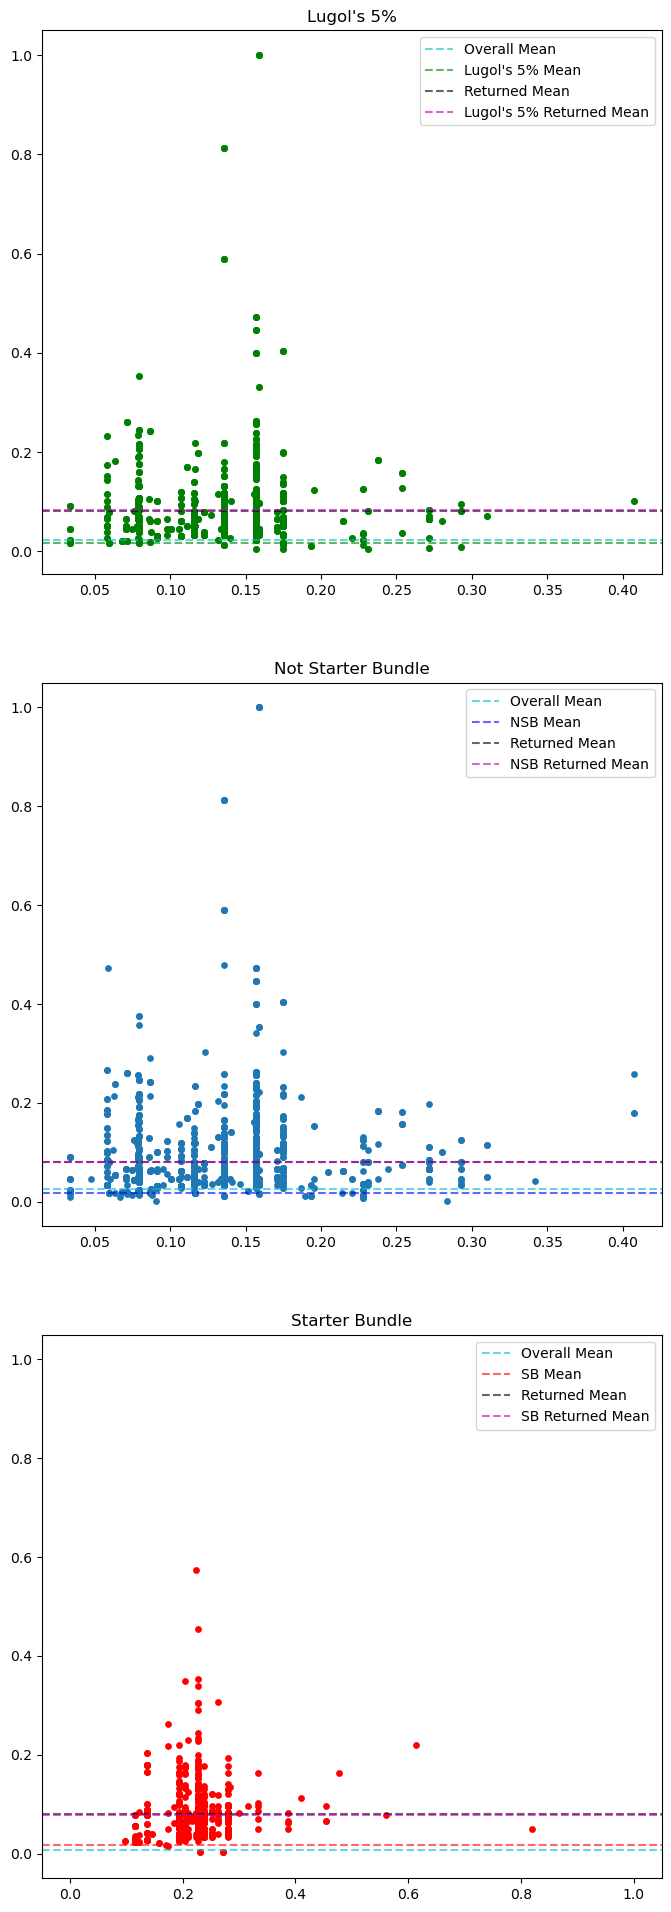

In [11]:
fig, ax = plt.subplots(3,1, figsize=(8, 24))
fig.subplots_adjust(wspace=0.5)
ax[2].scatter(x = df['first_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'sb'], y = df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'sb'], c = 'red', s = 15)
ax[2].set(title = 'Starter Bundle')
ax[2].axhline(y=df['returning_sales_scaled'][df['type'] == 'sb'].mean(), c='c', ls='--', alpha=0.6, label="Overall Mean")
ax[2].axhline(y=df['returning_sales_scaled'].mean(), c='r', ls='--', alpha=0.6, label="SB Mean")
ax[2].axhline(y=df['returning_sales_scaled'][df['returning_sales'] > 0].mean(), c='k', ls='--', alpha=0.6, label="Returned Mean")
ax[2].axhline(y=df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'sb'].mean(), c='m', ls='--', alpha=0.6, label="SB Returned Mean")
ax[2].legend()
ax[1].scatter(x = df['first_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'nsb'], y = df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'nsb'], s = 15)
ax[1].set(title = 'Not Starter Bundle')
ax[1].axhline(y=df['returning_sales_scaled'][df['type'] == 'nsb'].mean(), c='c', ls='--', alpha=0.6, label="Overall Mean")
ax[1].axhline(y=df['returning_sales_scaled'].mean(), c='b', ls='--', alpha=0.6, label="NSB Mean")
ax[1].axhline(y=df['returning_sales_scaled'][df['returning_sales'] > 0].mean(), c='k', ls='--', alpha=0.6, label="Returned Mean")
ax[1].axhline(y=df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'nsb'].mean(), c='m', ls='--', alpha=0.6, label="NSB Returned Mean")
ax[1].legend()
ax[0].scatter(x = df['first_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'l5'], y = df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'l5'], c = 'green', s = 15)
ax[0].set(title = "Lugol's 5%")
ax[0].axhline(y=df['returning_sales_scaled'][df['type'] == 'l5'].mean(), c='c', ls='--', alpha=0.6, label="Overall Mean")
ax[0].axhline(y=df['returning_sales_scaled'].mean(), c='g', ls='--', alpha=0.6, label="Lugol's 5% Mean")
ax[0].axhline(y=df['returning_sales_scaled'][df['returning_sales'] > 0].mean(), c='k', ls='--', alpha=0.6, label="Returned Mean")
ax[0].axhline(y=df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'l5'].mean(), c='m', ls='--', alpha=0.6, label="Lugol's 5% Returned Mean")
ax[0].legend()
plt.xlim(-.05, 1.05)
plt.ylim(-.05, 1.05)

In [12]:
print("The percentile of the overall returned customer returning order mean is " + str(round(df['returning_sales_scaled'][df['returning_sales'] > 0].mean() * 100, 2)) + '%.')
print("The percentile of the returned customer returning order mean for customers who initially purchased the Starter Bundle is " + str(round(df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'sb'].mean() * 100, 2)) + '%.')
print("The percentile of the returned customer returning order mean for customers who initially purchased something besides the        Starter Bundle is " + str(round(df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'nsb'].mean() * 100, 2)) + '%.')
print("The percentile of the returned customer returning order mean for customers who initially purchased the Lugol's 5% is " + str(round(df['returning_sales_scaled'][df['returning_sales'] > 0][df['type'] == 'l5'].mean() * 100, 2)) + '%.')

The percentile of the overall returned customer returning order mean is 8.11%.
The percentile of the returned customer returning order mean for customers who initially purchased the Starter Bundle is 7.76%.
The percentile of the returned customer returning order mean for customers who initially purchased something besides the        Starter Bundle is 8.01%.
The percentile of the returned customer returning order mean for customers who initially purchased the Lugol's 5% is 8.39%.


Though it is very hard to tell from these charts without looking closely, I've added a black line on each chart to indicate the mean of all returning order values of customers who returned to the store, as well as a purple line to indicate the returning order value of customers who returned to the store for each category of first order. The only category to be above the overall mean was the Lugol's 5%, showing that people who buy Lugol's 5% and return spend more on their return orders.

Now I'd like to use a KNN Model to predict whether a certain customer will spend more than the average customer when they return. First, to see the optimal number of neighbors to use, I'm going to try using GridSearchCV to find the best score from one to fifty. 

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [14]:
print(knn_cv.best_params_)

{'n_neighbors': 8}


In [15]:
print(knn_cv.best_score_)

0.6808597275257527


2 could likely be underfitting the data, so I will check again with the data split up in the next step.

I will now use a KNN model to predict whether or not a customer will return and spend above the returning average. I am going to do this twice, once for customers who initially bought the Starter Bundle, and once for customers who initially bought anything but the Starter Bundle.

In [16]:
#For the Starter Bundle group
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(Xs_train, ys_train)
    
    train_scores.append(knn.score(Xs_train,ys_train))
    test_scores.append(knn.score(Xs_test,ys_test))
    
knn_scores = pd.DataFrame({'Value of k': [i for i in range(1, 10)], 'Train Scores': train_scores, 'Test Scores': test_scores})
knn_scores

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behav

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behav

,Value of k,Train Scores,Test Scores
0,1,0.920577,0.925319
1,2,0.927563,0.931694
2,3,0.927411,0.931694
3,4,0.927107,0.931694
4,5,0.927107,0.931694
5,6,0.927107,0.931694
6,7,0.927107,0.931694
7,8,0.927107,0.931694
8,9,0.926651,0.931239


C:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


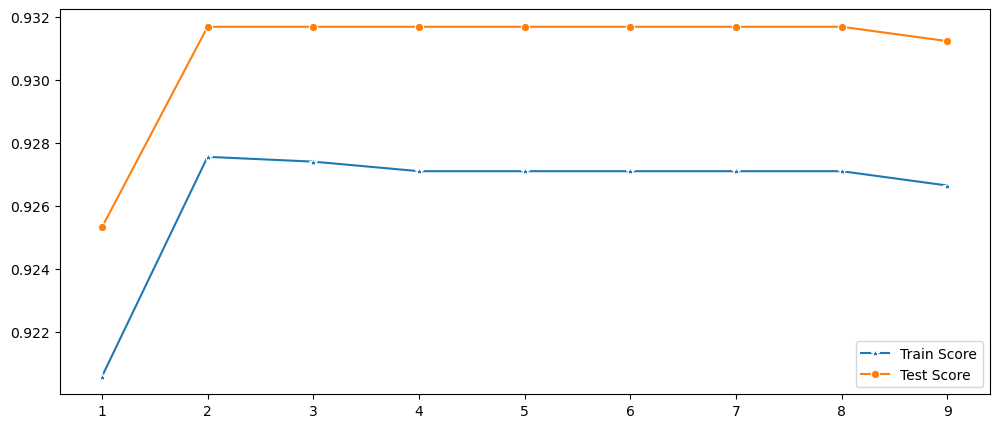

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatr

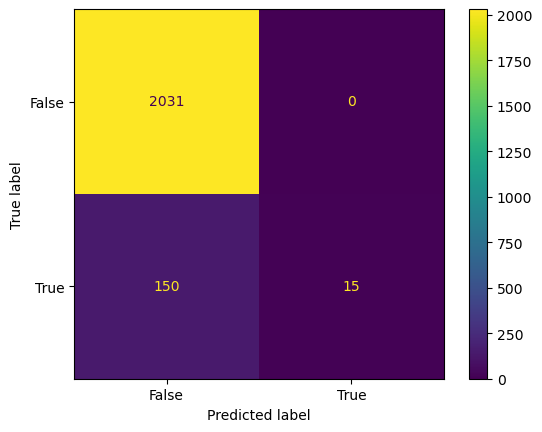

In [18]:
knn = KNeighborsClassifier(3)
knn.fit(Xs_train,ys_train)

from sklearn.metrics import confusion_matrix
ys_pred = knn.predict(Xs_test)
pl = confusion_matrix(ys_test,ys_pred)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, Xs_test, ys_test)
plt.show()

In [19]:
#For the non-Starter Bundle group
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(Xn_train, yn_train)
    
    train_scores.append(knn.score(Xn_train,yn_train))
    test_scores.append(knn.score(Xn_test,yn_test))
    
knn_scores = pd.DataFrame({'Value of k': [i for i in range(1, 10)], 'Train Scores': train_scores, 'Test Scores': test_scores})
knn_scores

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behav

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behav

,Value of k,Train Scores,Test Scores
0,1,0.619514,0.705450
1,2,0.617473,0.709124
2,3,0.580323,0.596448
3,4,0.615840,0.665034
4,5,0.616452,0.593999
5,6,0.744642,0.660135
6,7,0.748112,0.644825
7,8,0.747908,0.644825
8,9,0.747704,0.644825


C:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


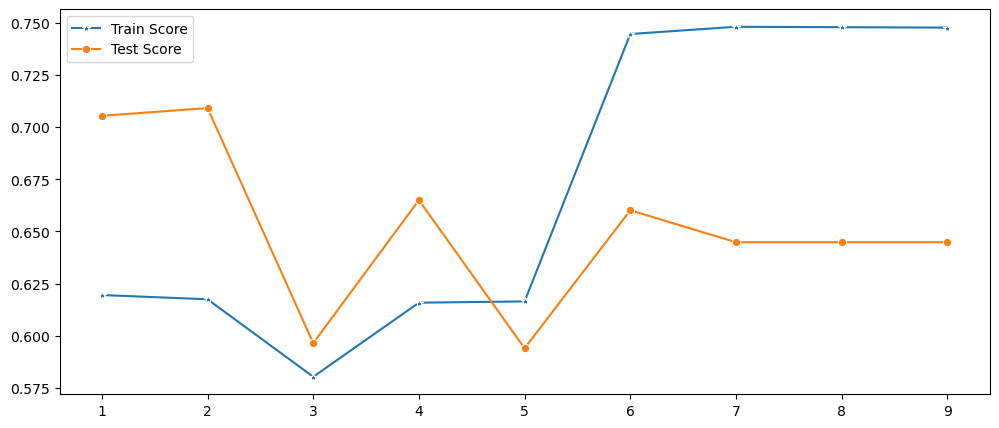

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatr

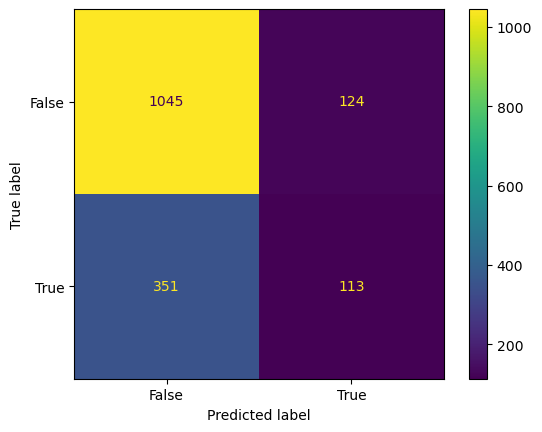

In [21]:
knn = KNeighborsClassifier(2)
knn.fit(Xn_train,yn_train)

from sklearn.metrics import confusion_matrix
yn_pred = knn.predict(Xn_test)
pl = confusion_matrix(yn_test,yn_pred)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, Xn_test, yn_test)
plt.show()

I feel very confident using KNN to predict the returning value of orders where people initally ordered the Starter Bundle. That model is very accurate in predicting correctly. Simultaneously, the KNN model for orders where people initially did not order the Starter Bundle is not the worst thing in the world. It leaves much to be desired, but KNN was very helpful for us so far.

The next method I will try is Gradient Boosting. Again, the data will be split up between Starter Bundle and not Starter Bundle.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=200, learning_rate = learning_rate, max_features=2, random_state = 246)
    gb.fit(Xs_train, ys_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(Xs_train, ys_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(Xs_test, ys_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.928
Accuracy score (validation): 0.932



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.1
Accuracy score (training): 0.928
Accuracy score (validation): 0.932



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.25
Accuracy score (training): 0.928
Accuracy score (validation): 0.932



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.5
Accuracy score (training): 0.928
Accuracy score (validation): 0.932



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.75
Accuracy score (training): 0.927
Accuracy score (validation): 0.931



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  1
Accuracy score (training): 0.928
Accuracy score (validation): 0.932



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

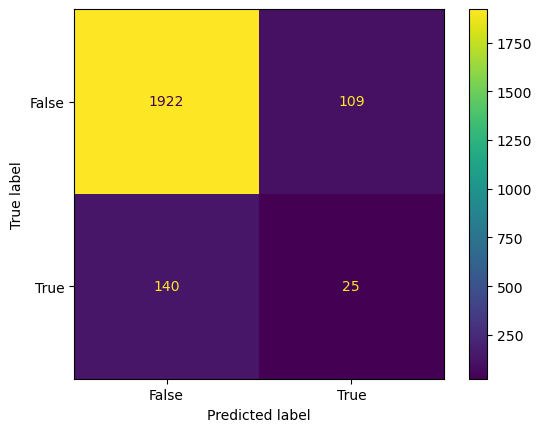

In [23]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate = .25, max_features=2, random_state = 246)
gb.fit(Xs_test, ys_test)
ys_pred = gb.predict(Xs_test)

plot_confusion_matrix(knn, Xs_test, ys_test)
plt.show()

In [24]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=200, learning_rate = learning_rate, max_features=2, random_state = 246)
    gb.fit(Xn_train, yn_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(Xn_train, yn_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(Xn_test, yn_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.748
Accuracy score (validation): 0.648



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.1
Accuracy score (training): 0.753
Accuracy score (validation): 0.645



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.25
Accuracy score (training): 0.754
Accuracy score (validation): 0.690



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.5
Accuracy score (training): 0.754
Accuracy score (validation): 0.690



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  0.75
Accuracy score (training): 0.754
Accuracy score (validation): 0.688



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Learning rate:  1
Accuracy score (training): 0.754
Accuracy score (validation): 0.689



C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Anthony\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

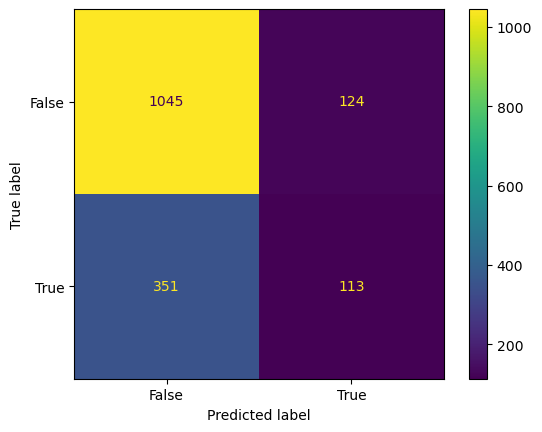

In [25]:
gb = GradientBoostingClassifier(n_estimators=200, learning_rate = .5, max_features=2, random_state = 246)
gb.fit(Xn_test, yn_test)
yn_pred = gb.predict(Xn_test)

plot_confusion_matrix(knn, Xn_test, yn_test)
plt.show()

When using Gradient Boosting for orders where the customer didn't buy the Starter Bundle first, we got the same prediction results as when we were using KNN. The difference was that the model used for instances when the customer first bought the Starter Bundle is significantly worse than the KNN model. For that reason, the KNN model is the best model for this dataset, and is what I will be referencing when drawing my conclusions. 